In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
ticker = 'TSLA'  # Tesla stock
df = yf.download(ticker, start='2018-01-01', end='2023-12-31')

print(df.head())  # Show the first few rows

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                             
2018-01-02  21.368668  21.474001  20.733334  20.799999   65283000
2018-01-03  21.150000  21.683332  21.036667  21.400000   67822500
2018-01-04  20.974667  21.236668  20.378668  20.858000  149194500
2018-01-05  21.105333  21.149332  20.799999  21.108000   68868000
2018-01-08  22.427334  22.468000  21.033333  21.066668  147891000


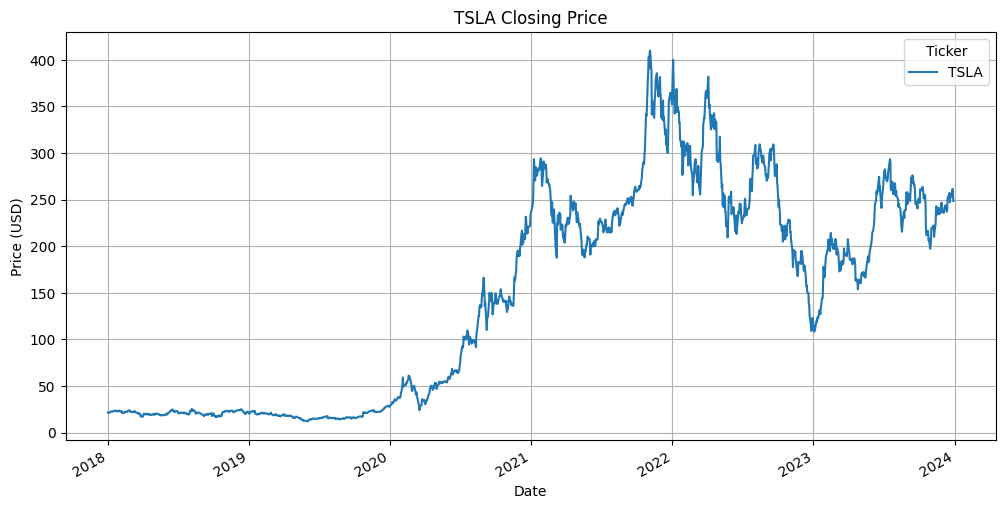

In [3]:
df['Close'].plot(title=f"{ticker} Closing Price", figsize=(12,6))
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid()
plt.show()

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Use only the 'Close' column
data = df[['Close']].values

# Scale the data to range [0, 1] (important for ML)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences (X) and next-day labels (y)
X = []
y = []
window_size = 60

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i - window_size:i, 0])  # last 60 days
    y.append(scaled_data[i, 0])  # the 61st day (target)

# Convert to numpy arrays and reshape
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # shape: (samples, 60, 1)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Flatten X to shape: (samples, 60)
X_flat = X.reshape(X.shape[0], X.shape[1])

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, shuffle=False)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0003436266120233408


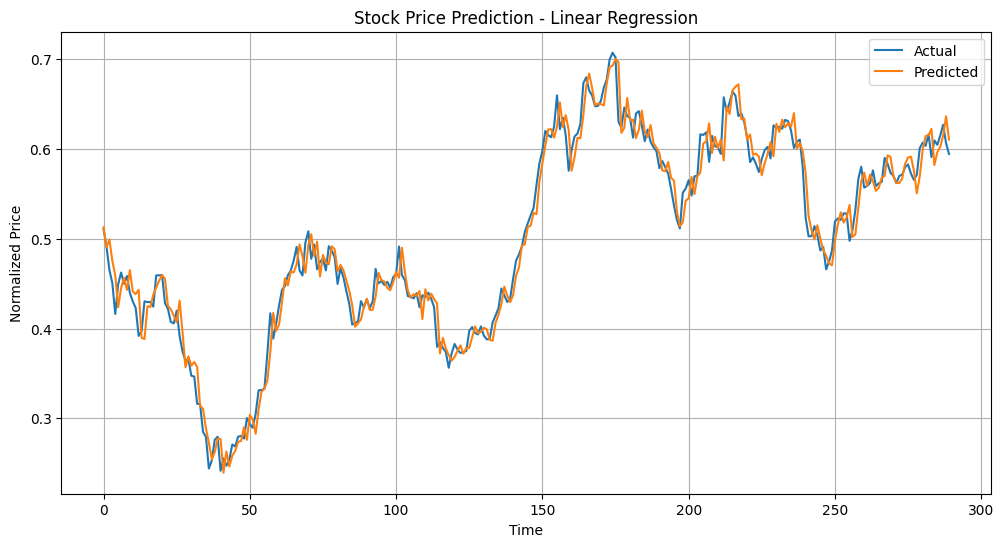

In [8]:
import matplotlib.pyplot as plt

# Plot true vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Stock Price Prediction - Linear Regression')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid()
plt.show()